In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Завантаження даних
file_path = 'weather.csv'
df = pd.read_csv(file_path)
# Перетворення стовпця Date у формат datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m', errors='coerce')
df = df.dropna()
# Переконатися, що типи даних коректні
df = df.astype({'Value': 'float64', 'Anomaly': 'float64'})
# Виділення року
df['Year'] = df['Date'].dt.year

In [3]:
# Фільтрація даних за період 1895-2020
df_filtered = df[(df['Year'] >= 1895) & (df['Year'] <= 2020)]
# Виконання лінійної регресії
linear_regression = linregress(df_filtered['Year'], df_filtered['Value'])
# Отримання коефіцієнтів регресії
slope = linear_regression.slope
intercept = linear_regression.intercept

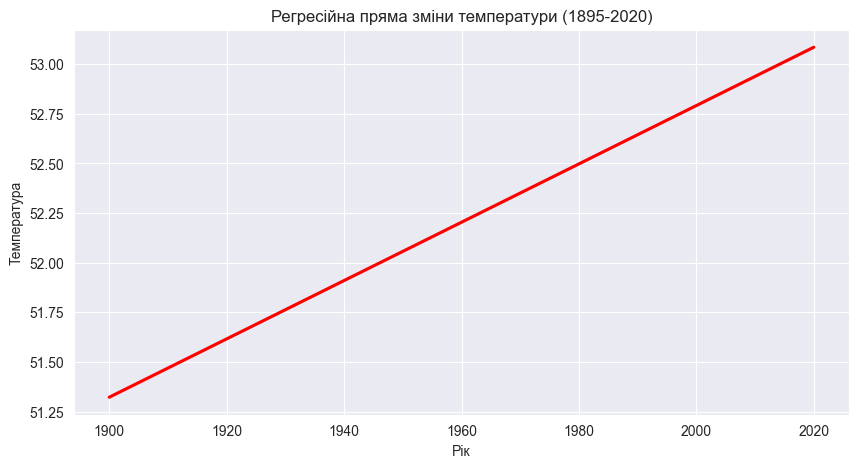

In [4]:
# Візуалізація регресійної прямої без точок розсіювання
plt.figure(figsize=(10, 5))
sns.regplot(x='Year', y='Value', data=df_filtered, line_kws={'color': 'red'}, scatter=False, ci=None)
plt.xlabel('Рік')
plt.ylabel('Температура')
plt.title('Регресійна пряма зміни температури (1895-2020)')
plt.show()

In [5]:
# Прогнозування температури на 2021-2024 роки
years = np.array([2021, 2022, 2023, 2024])
predicted_values = slope * years + intercept
# Виведення прогнозованих значень
for year, temp in zip(years, predicted_values):
    print(f'Прогнозована температура у {year} році: {temp:.2f}')

Прогнозована температура у 2021 році: 53.10
Прогнозована температура у 2022 році: 53.11
Прогнозована температура у 2023 році: 53.13
Прогнозована температура у 2024 році: 53.14


In [6]:
# Оцінка температури на 1890-1894 роки
years_past = np.array([1890, 1891, 1892, 1893, 1894])
predicted_values_past = slope * years_past + intercept
# Виведення оцінених значень на минуле
for year, temp in zip(years_past, predicted_values_past):
    print(f'Оцінена температура у {year} році: {temp:.2f}')

Оцінена температура у 1890 році: 51.18
Оцінена температура у 1891 році: 51.19
Оцінена температура у 1892 році: 51.20
Оцінена температура у 1893 році: 51.22
Оцінена температура у 1894 році: 51.23


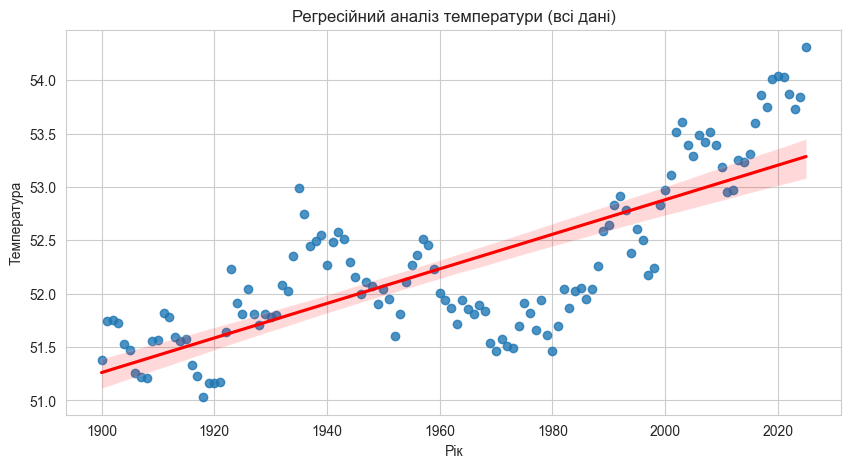

In [7]:
# Візуалізація всіх точок даних із регресійною прямою
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.regplot(x=df['Year'], y=df['Value'], scatter=True, line_kws={'color': 'red'})
plt.xlabel('Рік')
plt.ylabel('Температура')
plt.title('Регресійний аналіз температури (всі дані)')
plt.show()

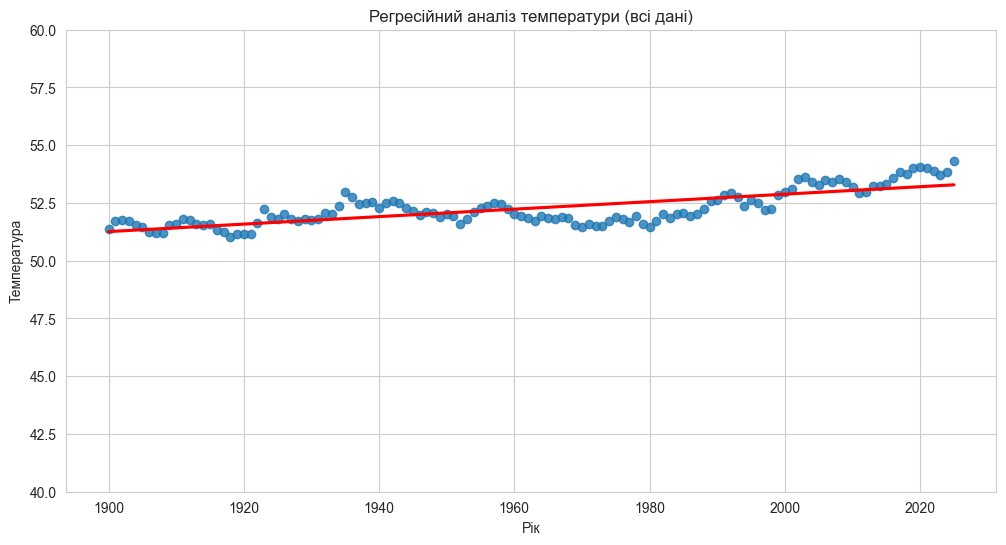

In [8]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
sns.regplot(x=df['Year'], y=df['Value'], scatter=True, line_kws={'color': 'red'}, ci=None, ax=ax)
ax.set_xlabel('Рік')
ax.set_ylabel('Температура')
ax.set_title('Регресійний аналіз температури (всі дані)')
ax.set_ylim(40, 60)  # Масштабування осі Y
plt.show()

In [9]:
# Прогнозовані температури (отримані з лінійної регресії)
predicted_temps = {
    2021: 53.10,
    2022: 53.11,
    2023: 53.13,
    2024: 53.14,
}
# Фактичні температури (значення з NOAA)
actual_temps = {
    2021: 53.5,
    2022: 54.0,
    2023: 54.2,
    2024: 54.5,
}
# Обчислення розбіжностей
differences = {year: actual_temps[year] - predicted_temps[year] for year in predicted_temps}
df_comparison = pd.DataFrame({
    "Year": list(predicted_temps.keys()),
    "Predicted Temperature": list(predicted_temps.values()),
    "Actual Temperature": [actual_temps[year] for year in predicted_temps.keys()],
    "Difference": [differences[year] for year in predicted_temps.keys()],
})
print(df_comparison)

   Year  Predicted Temperature  Actual Temperature  Difference
0  2021                  53.10                53.5        0.40
1  2022                  53.11                54.0        0.89
2  2023                  53.13                54.2        1.07
3  2024                  53.14                54.5        1.36
